In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os

np.set_printoptions(precision=3,suppress=True)

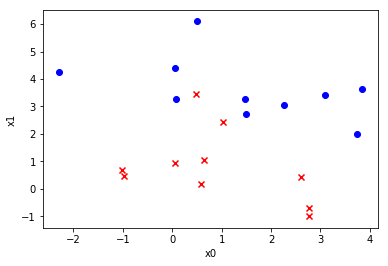

[[1.    0.071 3.258]
 [1.    0.065 4.404]
 [1.    3.845 3.63 ]
 [1.    0.51  6.126]
 [1.    2.255 3.063]]
[1. 1. 1. 1. 1.]


In [2]:
num_iters = 1000
alpha = 0.2

# class 0:
# covariance matrix and mean

cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 10
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 10
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

X = np.concatenate((r0,r1))
X = np.append(np.ones((len(X),1)), X, axis=1)
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1
print(X[:5])
print(y[:5])

m = len(y)
theta = np.array([1.1, 2.0, -.9]) 

Text(0,0.5,'$g(x)$')

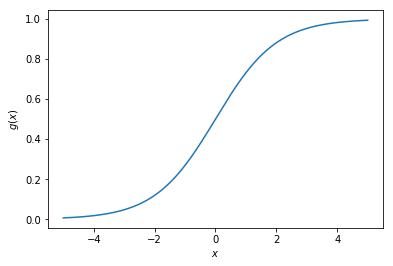

In [3]:
# Aufgabe  1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# test on a few values
xx = np.linspace(-5, 5, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

In [4]:
# Aufgabe 2
def logistic_hypothesis(theta):
    def h(X):
        y = sigmoid(np.dot(X, theta))
        return y
    return h


# test
theta_test_0 = np.array([1.1, 2.0, -.9]) 
h_test_0 = logistic_hypothesis(theta_test_0)
X_test_0 = X.copy()
print(h_test_0(X_test_0))

[0.156 0.061 0.996 0.033 0.946 0.835 0.751 0.001 0.985 0.999 0.999 0.259
 0.216 0.999 0.997 0.892 0.175 0.592 0.724 0.806]


In [5]:
# Aufgabe 3
def cross_entropy_loss(h, X, y):
    def loss(theta):
        h = logistic_hypothesis(theta)
        temp = np.dot(y, np.log(h(X))) + np.dot((1-y), np.log(1- h(X)))
        return temp
    return loss


# test
theta_test_1 = np.array([1.1, 2.0, -.9]) 
h_test_1 = logistic_hypothesis(theta_test_1)
X_test_1 = X.copy()
y_test_1 = y.copy()

loss_test_1 = cross_entropy_loss(h_test_1, X_test_1, y_test_1)
print(loss_test_1(theta_test_1))

-43.49461467108467


In [6]:
# Aufgabe 4
def cost_function(X, y, h, theta):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta)
    return cost

# test
theta_test_2 = np.array([1.1, 2.0, -.9]) 
h_test_2 = logistic_hypothesis(theta_test_2)
X_test_2 = X.copy()
y_test_2 = y.copy()

cost_test_2 = cost_function(X_test_2, y_test_2, h_test_2, theta_test_2)
print(cost_test_2)

2.1747307335542336


In [7]:
# Aufgabe 5
# a) 
def compute_new_theta(X, y, theta, alpha, h):
    theta = theta - np.dot(np.transpose(X), h(X) - y)*(alpha/m)
    return theta

# test
theta_test_3 = np.array([1.1, 2.0, -.9]) 
h_test_3 = logistic_hypothesis(theta_test_3)
X_test_3 = X.copy()
y_test_3 = y.copy()

theta_test_3 = compute_new_theta(X_test_3, y_test_3, theta_test_3, alpha, h_test_3)
print(theta_test_3)

[ 1.076  1.894 -0.746]


[-5.524  0.772  1.958]


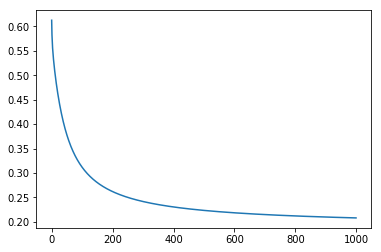

In [8]:
# b), c)
def gradient_descent(alpha, theta, X, y):
    J_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        h = logistic_hypothesis(theta)
        theta = compute_new_theta(X, y, theta, alpha, h)
        for j in range(m):
            j = cost_function(X, y, h, theta)
            J_history[i] = j
    return J_history, theta

# test
theta_test_4 = np.array([0, 0, 0]) 
h_test_4 = logistic_hypothesis(theta_test_4)
X_test_4 = X.copy()
y_test_4 = y.copy()

J_history, theta_result = gradient_descent(alpha, theta_test_4, X_test_4, y_test_4)
print(theta_result)
plt.plot(J_history)

In [9]:
# test Y
print("Y_before till 10: ", y)
h = logistic_hypothesis(theta_result)
y_after = h(X)
print("Y_after_gradient_descent till 10: ", y_after)

Y_before till 10:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y_after_gradient_descent till 10:  [0.713 0.959 0.99  0.999 0.902 0.731 0.885 0.736 0.971 0.779 0.008 0.829
 0.005 0.005 0.065 0.009 0.007 0.026 0.507 0.049]


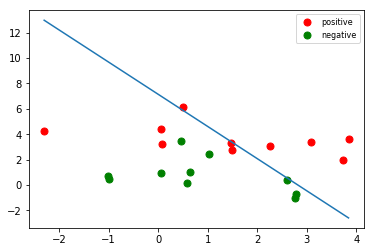

In [10]:
def plotDecisionBoundary(theta, X, y):
    
    plotData(X[:,1:], y)
    
    # get min and max values
    xx = np.array([np.min(X[:,1]), np.max(X[:,1])])
    
    # get boundary of separation
    yy = (- theta[0] - theta[2] * xx) / theta[1]
    
    plt.plot(xx, yy, lw=1.5)
    
def plotData(X, y):
    
    # get indices of 1 and 0 y values
    pos = y >= 0.5
    neg = y <= 0.5
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], 'o', color='r', ms=7, label=r'positive')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='g', ms=7,
            label=r'negative')
    
    # axes labels
    #plt.xlabel(r'Exam 1 Score')
    #plt.ylabel(r'Exam 2 Score')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

plotDecisionBoundary(theta_result, X, y)

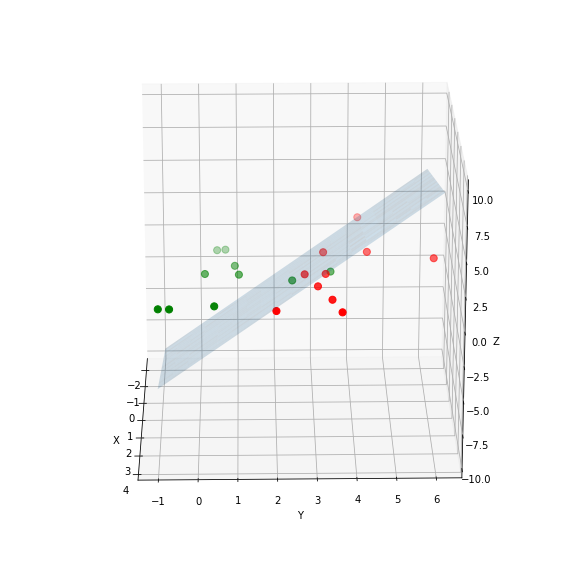

In [11]:
def plot3D(X, y, theta):
    
    # data
    data = np.c_[X[:, 1], X[:, 2], y]
    
    # negative/positive points
    pos = y >= 0.5
    neg = y <= 0.5
    
    X_0_pos = X[pos,1]
    X_0_pos = X_0_pos.reshape(len(X_0_pos), 1)
    X_1_pos = X[pos,2]
    X_1_pos = X_1_pos.reshape(len(X_1_pos), 1)
    Y_pos = y[pos]
    Y_pos = Y_pos.reshape(len(Y_pos), 1)
    
    X_0_neg = X[neg,1]
    X_0_neg = X_0_neg.reshape(len(X_0_neg), 1)
    X_1_neg = X[neg,2]
    X_1_neg = X_1_neg.reshape(len(X_1_neg), 1)
    Y_neg = y[neg]
    Y_neg = Y_neg.reshape(len(Y_neg), 1)
    
    # plot plane
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)
    X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
    Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0]  
    fig1 =  plt.figure(figsize=(10, 10))
    ax = fig1.gca(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
    
    # plot points
    ax.scatter(X_0_neg, X_1_neg, Y_neg, c='g', s=50)
    ax.scatter(X_0_pos, X_1_pos, Y_pos, c='r', s=50)
    
    # plot finish
    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('equal')
    ax.axis('tight')
    
    # rotate
    for angle in range(0, 360):
        ax.view_init(21, angle)

# test
plot3D(X, y, theta_result)